In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches for custom legends
import seaborn as sns
from scipy import stats

In [477]:
#Get some info
red_wine = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Exercises/Module 2/Sprint 1/wine+quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Exercises/Module 2/Sprint 1/wine+quality/winequality-white.csv', sep = ';')
all_wines = pd.concat([red_wine.describe(), white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

red_wine.head(10)
#white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [478]:
red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [479]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [480]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [481]:
#Checking for Nulls in the data
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [482]:
#Checking for duplicates
red_wine.duplicated().sum()

np.int64(240)

In [483]:
#Check for objects or strings in the data if there are any
#string_col = all_wines.select_dtypes(include="object").columns
#all_wines[string_col].head()

In [484]:
print(red_wine.shape)

(1599, 12)


In [485]:
red_wine.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [486]:
int_columns = red_wine.select_dtypes(include='int').columns
int_columns

Index(['quality'], dtype='object')

In [487]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


In [488]:
print(red_wine['quality_label'].unique())

['low', 'medium', 'high']
Categories (3, object): ['low', 'medium', 'high']


In [489]:
# Define the mapping dictionary
quality_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to the 'quality' column
red_wine['quality_label'] = red_wine['quality_label'].map(quality_mapping)

# Display the updated DataFrame
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [490]:
red_wine.drop(columns=['quality'], inplace=True)


In [491]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [492]:
red_wine['quality_label'].value_counts()

quality_label
0    744
1    638
2    217
Name: count, dtype: int64

In [493]:
#red_wine.drop(columns=['sulphates'], inplace=True)

In [494]:
red_wine.drop(columns=['density'], inplace=True)

In [495]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


In [496]:
red_wine_Ml = red_wine.copy()

Machine Learning for Red Wine with Logistic Regression


In [497]:
from sklearn.model_selection import train_test_split, GridSearchCV
# split data into X and Y
X = red_wine_Ml.drop('quality_label', axis=1) #exclude everything beside my target
y = red_wine_Ml['quality_label'] # my target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #divides X and y into training and testing sets.
# X_train: 80% of X, used to train the model. X_test: 20% of X, reserved for testing and evaluating the model. y_train: The target labels corresponding to X_train. y_test: The target labels corresponding to X_test.

In [498]:
y_test.shape # y_test.shape is used to check the shape (or dimensions) of the y_test array.

(320,)

In [499]:
X_test  # X_test contains a portion of the feature data (X) that was set aside specifically for testing the model.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,3.15,0.69,11.2


In [500]:
# Normalize data with sklearn
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform (X_test)

In [501]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=10000)

In [502]:
# fit model
LR_model.fit(X_train_norm, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [503]:
# predictions
preds = LR_model.predict(X_test_norm) 

In [504]:
from sklearn.metrics import mean_squared_error, accuracy_score # mse root mean square error

acc = accuracy_score(y_test, preds)
print("The accuracy of simple logistic regression without hyperparmeter :",acc)

The accuracy of simple logistic regression without hyperparmeter : 0.603125


In [505]:
y_test

803     1
124     0
350     1
682     0
1326    1
       ..
1259    1
1295    0
1155    0
963     1
704     0
Name: quality_label, Length: 320, dtype: category
Categories (3, int64): [0, 1, 2]

In [506]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,3.15,0.69,11.2


In [507]:
# Creating a Parameter Grid for Hyperparameter Tuning in Logistic Regression. In the first step of hyperparameter tuning there will be created a parameter grid to define the hyperparameters that are used to tune the Logistic Regression model performance.
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [508]:
# Get Best Possible Combination of Hyperparameters
clf = GridSearchCV(acc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=0.603125, n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [509]:
#Evaluatio Metrics
from sklearn.metrics import classification_report

In [510]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       141
           1       0.54      0.52      0.53       132
           2       0.53      0.19      0.28        47

    accuracy                           0.60       320
   macro avg       0.58      0.51      0.51       320
weighted avg       0.59      0.60      0.58       320



In [511]:
from sklearn.metrics import confusion_matrix

In [512]:
confusion_matrix(y_test, preds)

array([[115,  24,   2],
       [ 57,  69,   6],
       [  3,  35,   9]])

<Figure size 800x600 with 0 Axes>

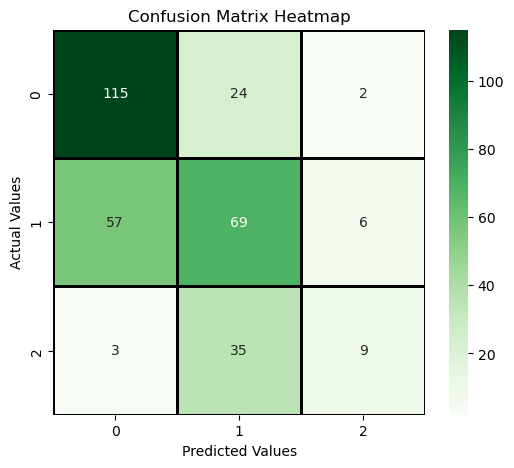

In [513]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = [0, 1, 2],
                     columns = [0, 1, 2])


plt.figure(figsize=(8,6))
#cm_df = cm_df / cm_df.sum() * 100
# Create a custom color map where all values are white
cmap = sns.color_palette("Greens", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=True, linewidths=0.8, linecolor='black')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Machine Learning for Red Wine with Random Forest

In [514]:
from sklearn.ensemble import RandomForestClassifier

In [515]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

In [516]:
# fit model
RF_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=101)

In [517]:
# predictions
preds = RF_clf.predict(X_test)

In [518]:
# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.71875


Machine Learning for Red Wine with KNN

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y have already been defined as features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the KNN model
k = 1  # Set k to the number of neighbors you want
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.53
Confusion Matrix:
 [[85 49  7]
 [53 64 15]
 [ 6 19 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.60      0.60       141
           1       0.48      0.48      0.48       132
           2       0.50      0.47      0.48        47

    accuracy                           0.53       320
   macro avg       0.53      0.52      0.52       320
weighted avg       0.53      0.53      0.53       320



RED WINE ML TESTING REPORT
Dropping 'sulphates'
Logistic Regression accuracy: 0.578125
Random Forest accuracy: 0.740625
KNN accuracy: 0.53

RED WINE ML TESTING REPORT
Dropping 'pH'
Logistic Regression accuracy: 0.590625
Random Forest accuracy: 0.703125
KNN accuracy: 0.53

RED WINE ML TESTING REPORT
Dropping 'citric acid'
Logistic Regression accuracy: 0.59375
Random Forest accuracy: 0.7
KNN accuracy: 0.53

RED WINE ML TESTING REPORT
Dropping 'fixed acidity'
Logistic Regression accuracy: 0.590625
Random Forest accuracy: 0.721875
KNN accuracy: 0.56

RED WINE ML TESTING REPORT
Dropping 'volatile acidity'
Logistic Regression accuracy: 0.575
Random Forest accuracy: 0.7125
KNN accuracy: 0.53

RED WINE ML TESTING REPORT
Dropping 'residual sugar'
Logistic Regression accuracy: 0.59375
Random Forest accuracy: 0.725
KNN accuracy: 0.57

RED WINE ML TESTING REPORT
Dropping 'chlorides'
Logistic Regression accuracy: 0.590625
Random Forest accuracy: 0.7
KNN accuracy: 0.53

RED WINE ML TESTING REPORT
Dropping 'density'
Logistic Regression accuracy: 603125
Random Forest accuracy: 0.71875
KNN accuracy: 0.53

WHITE WINE quality test

In [520]:
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [521]:
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [522]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [523]:
white_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [524]:
#Checking for Nulls in the data
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [525]:
#Checking for duplicates
white_wine.duplicated().sum()

np.int64(937)

In [526]:
#Check for objects or strings in the data if there are any
#string_col = all_wines.select_dtypes(include="object").columns
#all_wines[string_col].head()

In [527]:
print(white_wine.shape)

(4898, 12)


In [528]:
red_wine.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_label
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False


In [529]:
int_columns = white_wine.select_dtypes(include='int').columns
int_columns

Index(['quality'], dtype='object')

In [530]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high' ])
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


In [531]:
print(white_wine['quality_label'].unique())

['medium', 'low', 'high']
Categories (3, object): ['low', 'medium', 'high']


In [532]:
# Define the mapping dictionary
quality_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to the 'quality' column
white_wine['quality_label'] = white_wine['quality_label'].map(quality_mapping)

# Display the updated DataFrame
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,0


In [533]:
white_wine.drop(columns=['quality'], inplace=True)
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2


In [534]:
white_wine.drop(columns=['density'], inplace=True)
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,2


In [535]:
#white_wine.drop(columns=['total sulfur dioxide'], inplace=True)
#white_wine

In [536]:
white_wine_Ml = white_wine.copy()

In [537]:
from sklearn.model_selection import train_test_split, GridSearchCV
# split data into X and Y
X = white_wine_Ml.drop('quality_label', axis=1) #exclude everything beside my target
y = white_wine_Ml['quality_label'] # my target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [538]:
y_test.shape

(980,)

In [539]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,3.28,0.60,12.000000
...,...,...,...,...,...,...,...,...,...,...
3207,6.8,0.21,0.42,1.20,0.045,24.0,126.0,3.09,0.87,10.900000
1539,7.3,0.26,0.49,5.00,0.028,32.0,107.0,3.24,0.54,10.800000
964,5.9,0.26,0.21,12.50,0.034,36.0,152.0,3.28,0.43,9.500000
168,7.5,0.29,0.31,8.95,0.055,20.0,151.0,3.08,0.54,9.300000


In [540]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=10000)

In [541]:
# fit model
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [542]:
# predictions
preds = LR_model.predict(X_test) 

In [543]:
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc = accuracy_score(y_test, preds)
print(acc)

0.5530612244897959


In [544]:
#Evaluation Metrics
from sklearn.metrics import classification_report

In [545]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58       321
           1       0.52      0.68      0.59       432
           2       0.61      0.31      0.41       227

    accuracy                           0.55       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.57      0.55      0.54       980



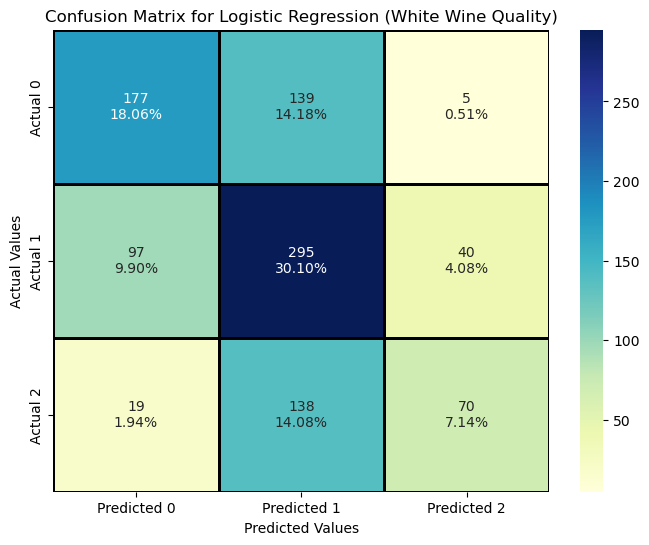

In [546]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Convert confusion matrix to DataFrame for clearer plotting
cm_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in range(len(cm))], 
                     columns=[f"Predicted {i}" for i in range(len(cm))])

# Calculate percentage for each cell
cm_percentage = cm / cm.sum() * 100

# Create custom labels for each cell with count and percentage
labels = [[f"{value}\n{percentage:.2f}%" for value, percentage in zip(row, row_percent)]
          for row, row_percent in zip(cm, cm_percentage)]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=labels, fmt="", cmap="YlGnBu", linewidths=0.8, linecolor='black', cbar=True)
plt.title("Confusion Matrix for Logistic Regression (White Wine Quality)")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

<Figure size 800x600 with 0 Axes>

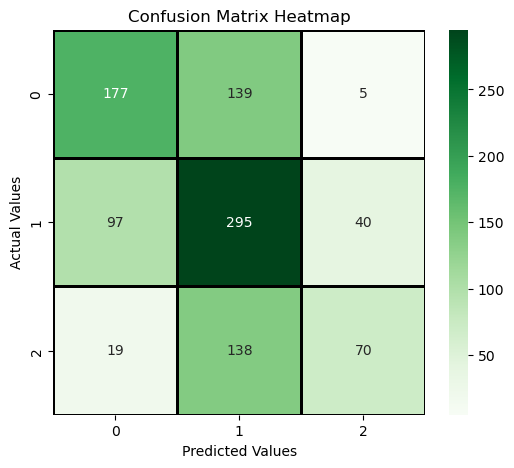

In [547]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = [0, 1, 2],
                     columns = [0, 1, 2])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette("Greens", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=True, linewidths=0.8, linecolor='black')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [548]:
from sklearn.ensemble import RandomForestClassifier

In [549]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

In [550]:
# fit model
RF_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=101)

In [551]:
# predictions
preds = RF_clf.predict(X_test)

In [552]:
# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.7408163265306122


In [553]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y have already been defined as features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the KNN model
k = 5  # Set k to the number of neighbors you want
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.53
Confusion Matrix:
 [[180 119  22]
 [121 258  53]
 [ 45 100  82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54       321
           1       0.54      0.60      0.57       432
           2       0.52      0.36      0.43       227

    accuracy                           0.53       980
   macro avg       0.53      0.51      0.51       980
weighted avg       0.53      0.53      0.53       980



WHITE WINE ML TESTING REPORT
Dropping 'total sulfur dioxide' and 'citric acid
Logistic Regression accuracy: 0.5459183673469388
Random Forest accuracy: 0.7295918367346939
KNN accuracy: 0.53

WHITE WINE ML TESTING REPORT
Dropping 
Logistic Regression accuracy: 
Random Forest accuracy: 
KNN accuracy: 

WHITE WINE ML TESTING REPORT
Dropping 
Logistic Regression accuracy: 
Random Forest accuracy: 
KNN accuracy: 

WHITE WINE ML TESTING REPORT
Dropping 
Logistic Regression accuracy: 
Random Forest accuracy: 
KNN accuracy: 

WHITE WINE ML TESTING REPORT
Dropping 
Logistic Regression accuracy: 
Random Forest accuracy: 
KNN accuracy: 

In [554]:
rml = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Exercises/Module 2/Sprint 1/wine+quality/winequality-red.csv', sep = ';')

# we are creating a new column called "quality_label", we define a range and associate that range with a label
rml['quality_label'] = rml['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
rml['quality_label'] = pd.Categorical(rml['quality_label'],
categories=['low', 'medium', 'high'])


# Define the mapping dictionary
quality_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to the 'quality' column
rml['quality_label'] = rml['quality_label'].map(quality_mapping)

rml.drop(columns=['quality'], inplace=True)


In [555]:
rml.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_label'],
      dtype='object')

In [556]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = rml.drop(['quality_label', 'pH', 'sulphates'], axis=1) #exclude everything beside my target
y = rml['quality_label'] # my target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #divides X and y into training and testing sets.

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform (X_test)

RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

#RF_clf.fit(X_train, y_train)
#y_pred = RF_clf.predict(X_test)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score to evaluate accuracy with stratified k-fold CV
scores = cross_val_score(RF_clf, X_train, y_train, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.73
Confusion Matrix:
 [[117  22   2]
 [ 30  89  13]
 [  2  17  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       141
           1       0.70      0.67      0.68       132
           2       0.65      0.60      0.62        47

    accuracy                           0.73       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.73      0.73      0.73       320



Accuracy: 0.73
Confusion Matrix:
 [[117  22   2]
 [ 30  89  13]
 [  2  17  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       141
           1       0.70      0.67      0.68       132
           2       0.65      0.60      0.62        47

    accuracy                           0.73       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.73      0.73      0.73       320



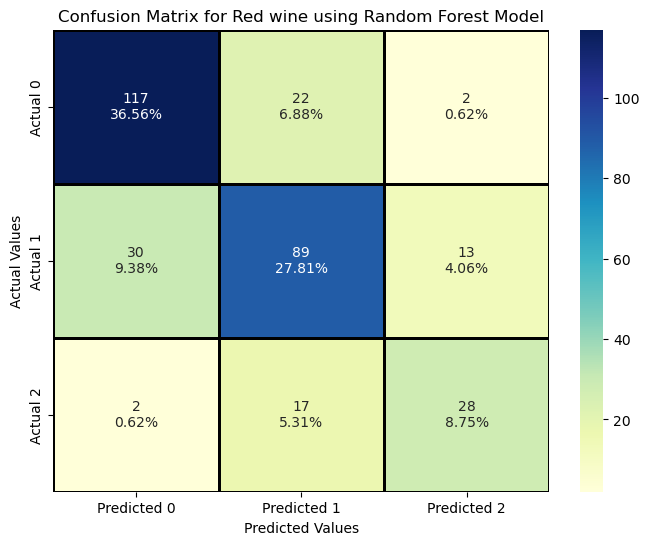

In [557]:
# Fit the Random Forest classifier and make predictions
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display a classification report for additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
cm_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in cm_df.index], 
                     columns=[f"Predicted {i}" for i in cm_df.columns])

# Create custom labels with counts and percentages
cm_percentage = cm / cm.sum() * 100
labels = [[f"{value}\n{percentage:.2f}%" for value, percentage in zip(row, row_percent)]
          for row, row_percent in zip(cm, cm_percentage)]

# Plot heatmap with custom labels and color map
sns.heatmap(cm_df, annot=labels, fmt="", cmap="YlGnBu", linewidths=0.8, linecolor='black', cbar=True)
plt.title("Confusion Matrix for Red wine using Random Forest Model")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [558]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Creating a Parameter Grid for Hyperparameter Tuning in Logistic Regression. In the first step of hyperparameter tuning there will be created a parameter grid to define the hyperparameters that are used to tune the Logistic Regression model performance.
param_grid = {
    'n_estimators': [100, 200, 500],         # Number of trees
    'max_depth': [None, 10, 20, 30],         # Max depth of trees
    'min_samples_split': [2, 5],             # Min samples to split a node
    'min_samples_leaf': [1, 2],              # Min samples at a leaf node        # Features to consider per split
    'bootstrap': [True, False]               # Use bootstrap samples
}

RF_clf = RandomForestClassifier(random_state=101)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get Best Possible Combination of Hyperparameters
clf = GridSearchCV(RF_clf,param_grid = param_grid, cv = stratified_kfold,  verbose=True,n_jobs=-1, scoring='accuracy')


clf.fit(X_train, y_train)


print("Best Parameters:", clf.best_params_)
print("Best Accuracy Score:", clf.best_score_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.7083547794117647
